In [2]:
"""
https://www.city.kawasaki.jp/170/page/0000009578.html 
https://www.data.jma.go.jp/gmd/risk/obsdl/index.php
- 気象庁のCSVデータはヘッダーを削除しておく。

2022-08-11 by N.Goto
"""
import pandas as pd
import plotly.express as px


def read_csv_data(fn):
    """　csvデータを読み込んで、DataFrameとして返す
    1. 気象庁ホームページから降水量データをダウンロードする。
    2. 気象庁のCSVデータはヘッダーを削除しておく。
    3. 使用するカラムは「日付」、「降雨量」の2列。
    """
    
    # ascii文字なので不要だが、お約束で。
    char_code = 'utf_8'

    # 時系列データなので、1列目をDatetimeIndexとして読み込む。 
    df = pd.read_csv(fn, encoding=char_code, parse_dates=True,
                     index_col=0, header=None, usecols=[0,1], skiprows=0, sep=",")

    # indexタイトル
    df.index.name = '日付'
    # columnタイトル
    df.columns = ['降水量']

    # データ数が50以上の場合、表示を制限する。
    pd.set_option('display.max_rows', 50)
    # 小数点以下1桁とする。
    pd.options.display.precision = 1

    return df


def create_year_df(df, yyyy=2015):
    """ 指定された年を抽出して、indexを月とするDataFrameを作る """
    # indexはdatetime型。そのyearで抽出して新しいDataFrameを作成する。
    df_year = df[df.index.year == yyyy]
    
    # indexを新規に設定して置き換える。
    df_year.index = ['1月','2月','3月','4月','5月','6月',
                     '7月','8月','9月','10月','11月','12月']
    # 列名を年度とする
    df_year.columns = [yyyy]

    return df_year



In [6]:
# plotlyによるグラフ表示
""" 降水量csvデータの読み込み """
# 日吉と羽田が公開されている。
df = read_csv_data('./data/hiyoshi.csv')

# データチェック
print(df.head(31))
# print(df.tail(31))
# print(df.sample(31))


             降水量
日付              
2015-01-01   0.0
2015-01-02   0.0
2015-01-03   0.0
2015-01-04   0.0
2015-01-05   0.0
2015-01-06  12.0
2015-01-07   0.0
2015-01-08   0.0
2015-01-09   0.0
2015-01-10   0.0
2015-01-11   0.0
2015-01-12   0.0
2015-01-13   0.0
2015-01-14   0.0
2015-01-15  34.5
2015-01-16   0.0
2015-01-17   0.0
2015-01-18   0.0
2015-01-19   0.0
2015-01-20   0.0
2015-01-21   3.5
2015-01-22   9.5
2015-01-23   8.5
2015-01-24   0.0
2015-01-25   0.0
2015-01-26   0.0
2015-01-27  14.5
2015-01-28   0.0
2015-01-29   0.0
2015-01-30  18.5
2015-01-31   0.0


In [7]:

def plot_original_data(df, height=650, width=950, title='無題'):
    """ オリジナルデータを表示。なぜかlineで棒グラフ？ """
    fig = px.line(df, height=height, width=width, title=title)

    fig.update_layout(font_size=14, hoverlabel_font_size=14, hoverlabel_font_color='white',
                      xaxis_title='日付', yaxis_title='降水量',
                      xaxis_title_font_size=14, yaxis_title_font_size=14)

    fig.show()
    

# データのグラフ表示
# plot_original_data(df, title='降水量データ'):w


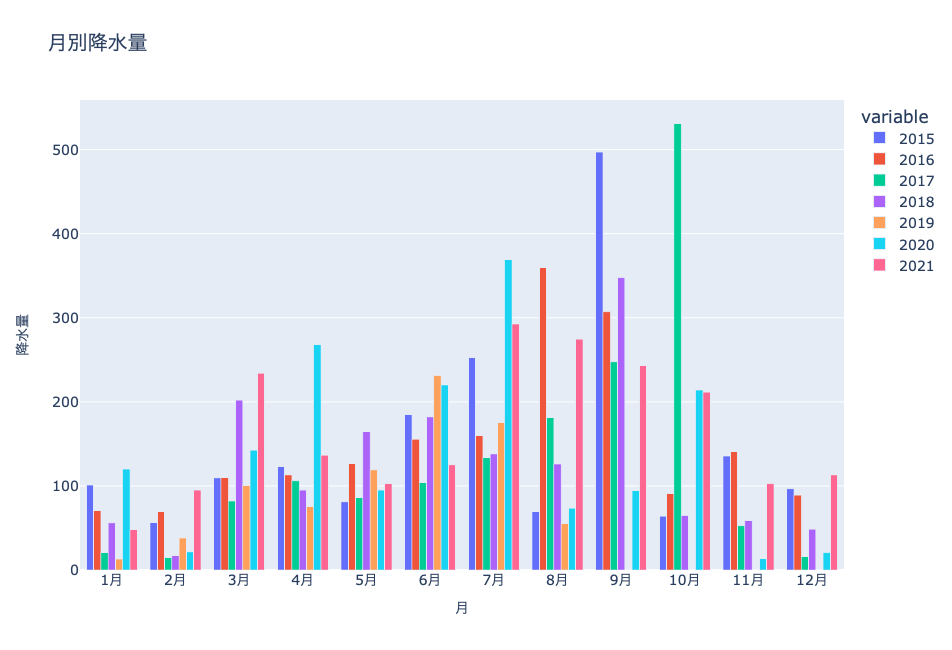

In [8]:

def plot_rain_amount(df, height=650, width=950, title='無題'):
    """ 降水量グラフ表示 """
    fig = px.bar(df, barmode='group', height=height, width=width, title=title)

    fig.update_layout(font_size=14, hoverlabel_font_size=14, hoverlabel_font_color='white',
                      xaxis_title='月', yaxis_title='降水量',
                      xaxis_title_font_size=14, yaxis_title_font_size=14)

    fig.show()


# 年月毎の合計降雨量（月で集約して合計する）
df_monthly_total = df.resample('M').sum()

# 読み込んだデータのスタート年と最終年を求める。
start_year = df_monthly_total.index.year.min()
last_year = df_monthly_total.index.year.max()

# 空のDataFrameを作成。
new_df = pd.DataFrame(index=[], columns=[])
# 月をIndexとするDataFrameを作成。
for y in range(start_year, last_year, 1):
    # 月をindexとする、月別降水量のDataFrameを作成
    df_name = create_year_df(df_monthly_total, y)

    # グラフ化するため、各年度で1月〜12月のデータをまとめる。
    new_df = pd.concat([new_df, df_name], axis=1)
    
# グラフ表示
plot_rain_amount(new_df, 650, 950, '月別降水量')


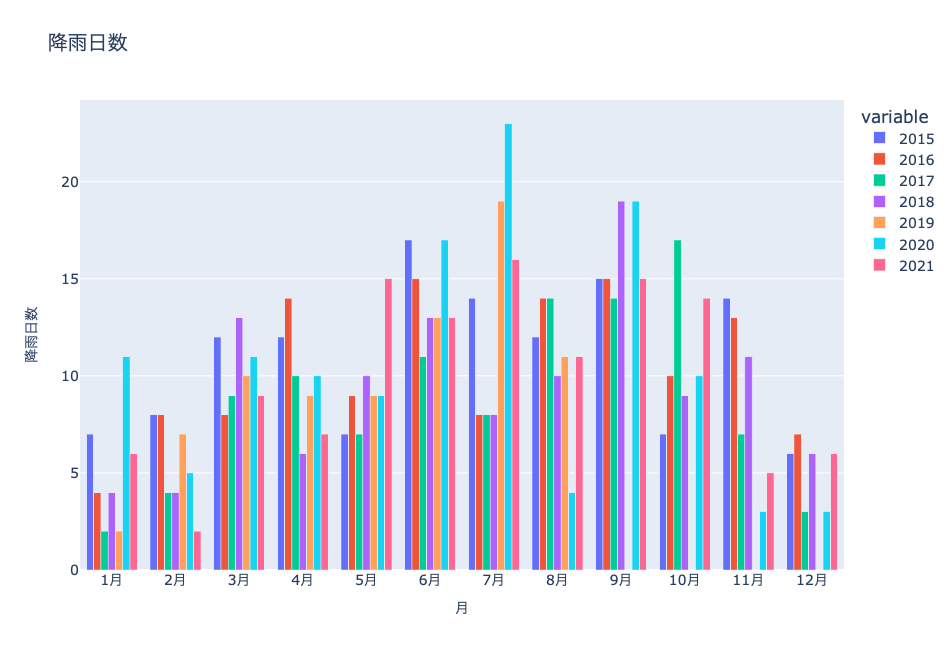

In [9]:

def plot_rainy_days(df, height=650, width=950, title='無題'):
    fig = px.bar(new_df, barmode='group',  height=650, width=950, title=title)
    fig.update_layout(font_size=14, hoverlabel_font_size=14, hoverlabel_font_color='white',
                      xaxis_title='月', yaxis_title='降雨日数',
                      xaxis_title_font_size=14, yaxis_title_font_size=14)

    fig.show()


""" 降水量が1mm以上の日をカウント """
# 月毎の降雨日数（月で集約して合計する）
df_rainy_days = df[df['降水量']>0].resample('M').count()
# print(df_count)

# 読み込んだデータのスタート年と最終年を求める。
start_year = df_rainy_days.index.year.min()
last_year = df_rainy_days.index.year.max()

# 空のDataFrameを作成。
new_df = pd.DataFrame(index=[], columns=[])
# 月をIndexとするDataFrameを作成。
for y in range(start_year, last_year,1):
    # df_name = y
    df_name = create_year_df(df_rainy_days, y)
    new_df = pd.concat([new_df, df_name], axis=1)
    
# グラフ表示
plot_rainy_days(new_df, 650, 950, '降雨日数')
